In [68]:
from PIL import Image
from IPython.display import display
import csv
import requests as r
import datetime as dt

In [69]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)

In [70]:
resp.status_code

200

In [71]:
raw_data = resp.json()

In [72]:
raw_data[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [73]:
final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'],obs['Deaths'],obs['Recovered'],\
                       obs['Active'], obs['Date']])

In [74]:
final_data.insert(0, ['Confirmados', 'Obitos', 'Recuperados', 'Ativos', 'data'])

In [75]:
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

In [76]:
for i in range(1, len(final_data)):
    final_data[i][DATA] =  final_data[i][DATA][:10]

In [77]:
with open('brasil-covid.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)

In [78]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')

In [79]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
            })
            return datasets
    else:
        return[
            {
                'label': labels[0],
                'data': y
            }
        ]

In [80]:
def set_title(title= ''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return{
        'title': title,
        'display': display
    }

In [81]:
from pkgutil import get_data


def create_chart(x, y, labels, kind='bar', title=''):
    
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data':{
            'labels':x,
            'datasets': datasets
        },
        'options': options
    }
    return chart

In [82]:
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [83]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [84]:
def display_image(path):
    img_pill = Image.open(path)
    display(img_pill)

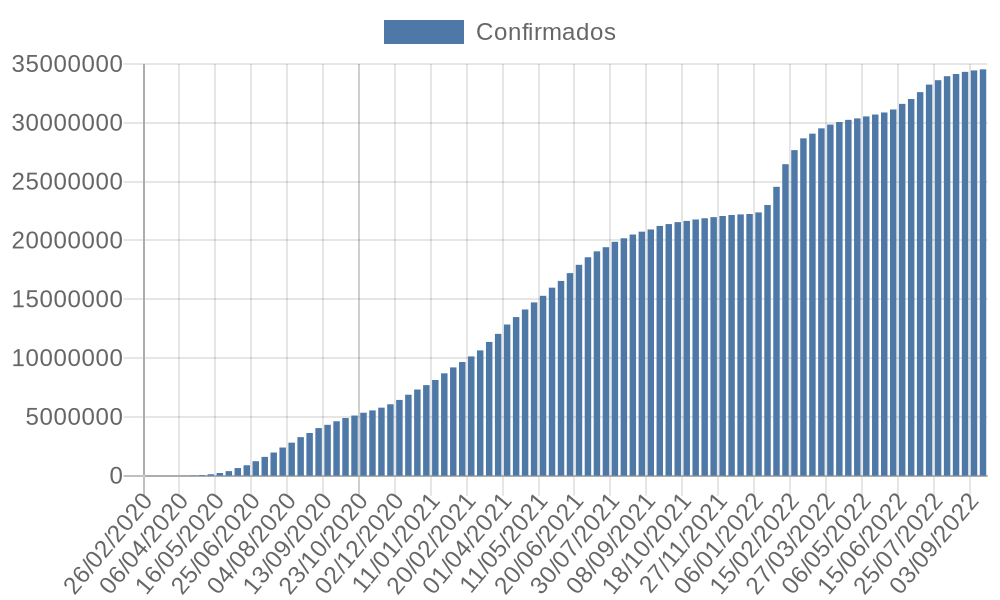

In [86]:

y_data_1 = []
for obs in final_data[1::10]:
    y_data_1.append(obs[CONFIRMADOS])
    
y_data_2 = []
for obs in final_data[1::10]:
    y_data_2.append(obs[RECUPERADOS])

labels = ['Confirmados', 'Recuperados']

x = []
for obs in final_data[1::10]:
    x.append(obs[DATA].strftime('%d/%m/%Y'))
titulo = 'Grafico confirmados vs recuperados'
chart = create_chart(x, [y_data_1, y_data_2], labels, title=titulo)
chart_content = get_api_chart(chart)
save_image(f'{titulo}.png', chart_content)
display_image('grafico1.png')